# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
from s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 400
LEARNING_RATE = 0.1
BATCH_SIZE = 128
ACTIVATION = "tanh"
N_HIDDEN = [128, 64, 32]
REGULARIZER = keras.regularizers.l2(0.001)
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def architecture1():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name


def architecture2():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,),
                                      batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons,
                                     activation=ACTIVATION,
                                     kernel_regularizer=REGULARIZER
                                    ))
        
    model.add(keras.layers.Dense(OUTPUT_SIZE, 
                                 activation="softmax"))
    
    model_name = "D128_D64_D32"
    return model, model_name


def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = architecture2()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/400
101/101 [==============================] - 2s 6ms/step - loss: 1.6735 - categorical_accuracy: 0.6038 - val_loss: 0.9517 - val_categorical_accuracy: 0.6780
Epoch 2/400
101/101 [==============================] - 0s 5ms/step - loss: 0.9278 - categorical_accuracy: 0.6781 - val_loss: 0.9078 - val_categorical_accuracy: 0.6644
Epoch 3/400
101/101 [==============================] - 0s 5ms/step - loss: 0.9312 - categorical_accuracy: 0.6729 - val_loss: 1.0464 - val_categorical_accuracy: 0.6849
Epoch 4/400
101/101 [==============================] - 0s 5ms/step - loss: 0.8676 - categorical_accuracy: 0.7016 - val_loss: 0.8805 - val_categorical_accuracy: 0.6948
Epoch 5/400
101/101 [==============================] - 0s 5ms/step - loss: 0.8224 - categorical_accuracy: 0.7136 - val_loss: 0.9433 - val_categorical_accuracy: 0.6793
Epoch 6/400
101/101 [==============================] - 0s 5ms/step - loss: 1.0278 - categorical_accuracy: 0.6780 - val_loss: 0.8970 - val_categorical_accuracy: 0.718

Epoch 50/400
101/101 [==============================] - 1s 7ms/step - loss: 1.6025 - categorical_accuracy: 0.5258 - val_loss: 1.6294 - val_categorical_accuracy: 0.4864
Epoch 51/400
101/101 [==============================] - 1s 7ms/step - loss: 2.0136 - categorical_accuracy: 0.4340 - val_loss: 1.8053 - val_categorical_accuracy: 0.5825
Epoch 52/400
101/101 [==============================] - 1s 7ms/step - loss: 1.6647 - categorical_accuracy: 0.5069 - val_loss: 1.7775 - val_categorical_accuracy: 0.4950
Epoch 53/400
101/101 [==============================] - 1s 7ms/step - loss: 1.8416 - categorical_accuracy: 0.4379 - val_loss: 2.0164 - val_categorical_accuracy: 0.4758
Epoch 54/400
101/101 [==============================] - 1s 7ms/step - loss: 1.9509 - categorical_accuracy: 0.3295 - val_loss: 1.7147 - val_categorical_accuracy: 0.2717
Epoch 55/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5190 - categorical_accuracy: 0.2539 - val_loss: 1.4794 - val_categorical_accuracy:

Epoch 99/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4288 - categorical_accuracy: 0.2542 - val_loss: 1.4279 - val_categorical_accuracy: 0.2339
Epoch 100/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4535 - categorical_accuracy: 0.2511 - val_loss: 1.5887 - val_categorical_accuracy: 0.2717
Epoch 101/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4912 - categorical_accuracy: 0.2588 - val_loss: 1.5583 - val_categorical_accuracy: 0.2128
Epoch 102/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4786 - categorical_accuracy: 0.2546 - val_loss: 1.4020 - val_categorical_accuracy: 0.2816
Epoch 103/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4417 - categorical_accuracy: 0.2548 - val_loss: 1.4367 - val_categorical_accuracy: 0.2717
Epoch 104/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4624 - categorical_accuracy: 0.2521 - val_loss: 1.3978 - val_categorical_accu

101/101 [==============================] - 1s 7ms/step - loss: 1.4489 - categorical_accuracy: 0.2571 - val_loss: 1.4431 - val_categorical_accuracy: 0.2128
Epoch 148/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5641 - categorical_accuracy: 0.2491 - val_loss: 1.4372 - val_categorical_accuracy: 0.2339
Epoch 149/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5710 - categorical_accuracy: 0.2577 - val_loss: 1.4973 - val_categorical_accuracy: 0.2816
Epoch 150/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4898 - categorical_accuracy: 0.2521 - val_loss: 1.4999 - val_categorical_accuracy: 0.2816
Epoch 151/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5801 - categorical_accuracy: 0.2429 - val_loss: 1.4275 - val_categorical_accuracy: 0.2717
Epoch 152/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4697 - categorical_accuracy: 0.2552 - val_loss: 1.4034 - val_categorical_accuracy: 0.2717


101/101 [==============================] - 1s 7ms/step - loss: 1.4450 - categorical_accuracy: 0.2544 - val_loss: 1.3947 - val_categorical_accuracy: 0.2816
Epoch 196/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4575 - categorical_accuracy: 0.2587 - val_loss: 1.3951 - val_categorical_accuracy: 0.2816
Epoch 197/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4436 - categorical_accuracy: 0.2556 - val_loss: 1.5375 - val_categorical_accuracy: 0.2339
Epoch 198/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4390 - categorical_accuracy: 0.2468 - val_loss: 1.4992 - val_categorical_accuracy: 0.2717
Epoch 199/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4334 - categorical_accuracy: 0.2642 - val_loss: 1.3960 - val_categorical_accuracy: 0.2339
Epoch 200/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5951 - categorical_accuracy: 0.2605 - val_loss: 1.6304 - val_categorical_accuracy: 0.2717


101/101 [==============================] - 1s 7ms/step - loss: 1.4916 - categorical_accuracy: 0.2538 - val_loss: 1.5249 - val_categorical_accuracy: 0.2128
Epoch 244/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4839 - categorical_accuracy: 0.2587 - val_loss: 1.7801 - val_categorical_accuracy: 0.2717
Epoch 245/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5066 - categorical_accuracy: 0.2561 - val_loss: 1.4377 - val_categorical_accuracy: 0.2816
Epoch 246/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4309 - categorical_accuracy: 0.2512 - val_loss: 1.4129 - val_categorical_accuracy: 0.2128
Epoch 247/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4669 - categorical_accuracy: 0.2529 - val_loss: 1.5349 - val_categorical_accuracy: 0.2339
Epoch 248/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4414 - categorical_accuracy: 0.2473 - val_loss: 1.4734 - val_categorical_accuracy: 0.2816


101/101 [==============================] - 1s 7ms/step - loss: 1.4408 - categorical_accuracy: 0.2531 - val_loss: 1.4156 - val_categorical_accuracy: 0.2128
Epoch 292/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4490 - categorical_accuracy: 0.2446 - val_loss: 1.4435 - val_categorical_accuracy: 0.2339
Epoch 293/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4353 - categorical_accuracy: 0.2477 - val_loss: 1.4343 - val_categorical_accuracy: 0.2717
Epoch 294/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5233 - categorical_accuracy: 0.2540 - val_loss: 1.8745 - val_categorical_accuracy: 0.2339
Epoch 295/400
101/101 [==============================] - 1s 7ms/step - loss: 1.5422 - categorical_accuracy: 0.2516 - val_loss: 1.4051 - val_categorical_accuracy: 0.2816
Epoch 296/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4887 - categorical_accuracy: 0.2551 - val_loss: 1.3931 - val_categorical_accuracy: 0.2339


101/101 [==============================] - 1s 7ms/step - loss: 1.4374 - categorical_accuracy: 0.2632 - val_loss: 1.5134 - val_categorical_accuracy: 0.2339
Epoch 340/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4623 - categorical_accuracy: 0.2403 - val_loss: 1.4350 - val_categorical_accuracy: 0.2717
Epoch 341/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4442 - categorical_accuracy: 0.2562 - val_loss: 1.4055 - val_categorical_accuracy: 0.2717
Epoch 342/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4393 - categorical_accuracy: 0.2513 - val_loss: 1.3921 - val_categorical_accuracy: 0.2717
Epoch 343/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4505 - categorical_accuracy: 0.2501 - val_loss: 1.4495 - val_categorical_accuracy: 0.2816
Epoch 344/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4336 - categorical_accuracy: 0.2587 - val_loss: 1.4339 - val_categorical_accuracy: 0.2339


101/101 [==============================] - 1s 7ms/step - loss: 1.4555 - categorical_accuracy: 0.2548 - val_loss: 1.4232 - val_categorical_accuracy: 0.2816
Epoch 388/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4650 - categorical_accuracy: 0.2539 - val_loss: 1.4048 - val_categorical_accuracy: 0.2816
Epoch 389/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4471 - categorical_accuracy: 0.2573 - val_loss: 1.5227 - val_categorical_accuracy: 0.2339
Epoch 390/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4624 - categorical_accuracy: 0.2531 - val_loss: 1.4329 - val_categorical_accuracy: 0.2816
Epoch 391/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4461 - categorical_accuracy: 0.2593 - val_loss: 1.4271 - val_categorical_accuracy: 0.2128
Epoch 392/400
101/101 [==============================] - 1s 7ms/step - loss: 1.4327 - categorical_accuracy: 0.2546 - val_loss: 1.4166 - val_categorical_accuracy: 0.2339


## Step 7: Analyze results

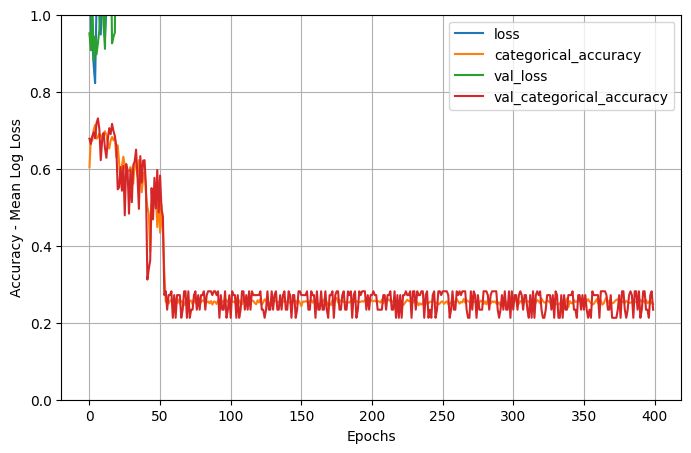

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 75.17 %
Error (test): 76.61 %
Bias: 70.17
Variance: 1.44
Time:  273 seconds


In [19]:
def draw_confusion_matrix(cm, categories, normalize=True):
    # Draw confusion matrix
    fig = plt.figure(figsize=[3*pow(len(categories), 0.5), 2*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    if normalize:
        cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=categories, yticklabels=categories, ylabel='Annotation', xlabel='Prediction')
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(12-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)


In [20]:
labels_pred = my_model.predict(instances_dev)
cm = confusion_matrix(np.argmax(labels_dev, axis=1), np.argmax(labels_pred, axis=1))
draw_confusion_matrix(cm, ["Poor", "Intermediate", "Good", "Excellent"])

51/51 [==============================] - 0s 2ms/step


NameError: name 'confusion_matrix' is not defined

## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "ADAM",
    "l2 0.001",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

      model_name  epochs  learning_rate  batch_size activation  \
31  D128_D64_D32     400            0.1         128       tanh   
32  D128_D64_D32     400            0.1         128       tanh   
33  D128_D64_D32     400            0.1         128       tanh   
34  D128_D64_D32     400            0.1         128       tanh   
35  D128_D64_D32     400            0.1         128       tanh   

                        loss optimizer regularization  train_accuracy  \
31  categorical_crossentropy       SGD       l2 0.001           80.96   
32  categorical_crossentropy       SGD       l2 0.001           81.00   
33  categorical_crossentropy       SGD       l2 0.001           81.29   
34  categorical_crossentropy       SGD       l2 0.001           81.36   
35  categorical_crossentropy      ADAM       l2 0.001           24.83   

    validation_accuracy   bias  variance  training_time  
31                78.60  14.04      2.36            255  
32                80.65  14.00      0.35        

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-3.h5"
my_model.save(save_name)